In [99]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

GENOME_LEN = 16569

gs = pd.read_csv("../data/new_data/GS.csv")
ms = pd.read_csv("../data/new_data/MS.csv")
uzd = pd.read_csv("../data/new_data/UZD.csv")

In [100]:
# ffs, USE DOTS! DO NOT USE COMMAS IN DECIMALS
for col in gs.columns[1:]:  
    gs[col] = gs[col].apply(lambda x: float(str(x).replace(',', '.')) if isinstance(x, str) else float(x))
for col in ms.columns[1:]:  
    ms[col] = ms[col].apply(lambda x: float(str(x).replace(',', '.')) if isinstance(x, str) else float(x))
for col in uzd.columns[1:]:  
    uzd[col] = uzd[col].apply(lambda x: float(str(x).replace(',', '.')) if isinstance(x, str) else float(x))

In [101]:
def mark_lvl(val):
    if 0.05 <= val < 0.1:
        return "low heteroplasmic"
    elif 0.1 <= val < 0.95:
        return "intermediate heteroplasmic"
    elif 0.95 <= val <= 1:
        return "homoplasmic"
    else:
        return "below threshold"
    
def get_freq(df):
    for col in df.columns[1:]:
        df[col] = df[col].apply(mark_lvl)

    melted_df = df.melt(
    id_vars=['Position'], 
    value_vars=[col for col in df.columns if col != 'Position'],
    var_name='Sample', 
    value_name='Category'
    )

    df = pd.crosstab(
        index=melted_df['Position'],
        columns=melted_df['Category'],
        normalize='index'
    )

    df = df.round(2)  
    df = df.reset_index()
    df = df.drop('below threshold', axis=1)

    return df 
    

In [102]:
# ingore that index is named "Category", doesn't matter
gs = get_freq(gs)
ms = get_freq(ms)
uzd = get_freq(uzd)

In [106]:
# transform df to be plot ready
gs = gs.melt(
    id_vars=['Position'],
    value_vars=['homoplasmic', 'intermediate heteroplasmic', 'low heteroplasmic'],
    var_name='Category',
    value_name='Freq'
)

ms = ms.melt(
    id_vars=['Position'],
    value_vars=['homoplasmic', 'intermediate heteroplasmic', 'low heteroplasmic'],
    var_name='Category',
    value_name='Freq'
)

uzd = uzd.melt(
    id_vars=['Position'],
    value_vars=['homoplasmic', 'intermediate heteroplasmic', 'low heteroplasmic'],
    var_name='Category',
    value_name='Freq'
)

In [110]:
gs

,Position,Category,Freq
0,1,homoplasmic,0.0
1,2,homoplasmic,0.0
2,3,homoplasmic,0.0
3,4,homoplasmic,0.0
4,5,homoplasmic,0.0
...,...,...,...
49681,16565,low heteroplasmic,0.0
49682,16566,low heteroplasmic,0.0
49683,16567,low heteroplasmic,0.0
49684,16568,low heteroplasmic,0.0


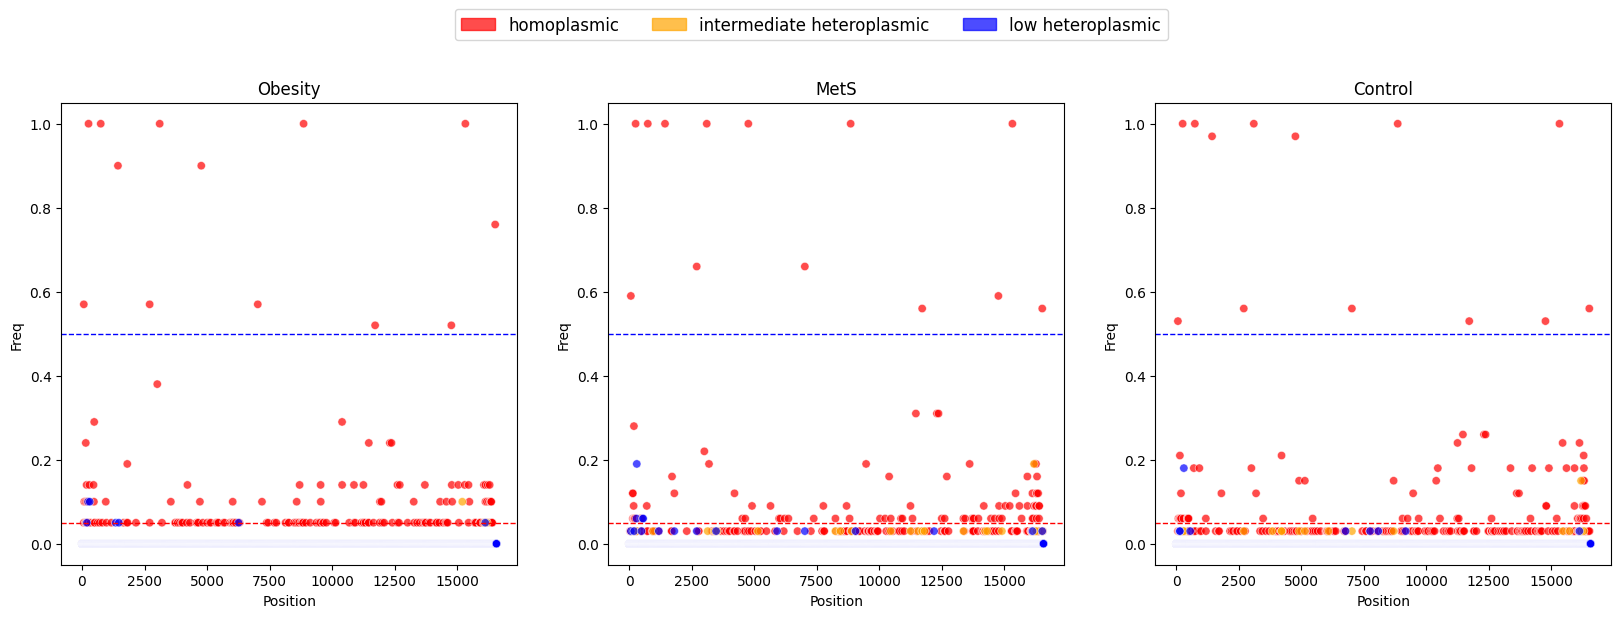

In [126]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.scatterplot(
    data=gs,
    x='Position',
    y='Freq',
    hue='Category',
    palette=['red', 'orange', 'blue'],  # Custom colors
    alpha=0.7,
    ax=axes[0],
    legend=False
)
axes[0].axhline(y=0.05, color='red', linestyle='--', linewidth=1)
axes[0].axhline(y=0.5, color='blue', linestyle='--', linewidth=1)
axes[0].set_title('Obesity')

sns.scatterplot(
    data=ms,
    x='Position',
    y='Freq',
    hue='Category',
    palette=['red', 'orange', 'blue'],  # Custom colors
    alpha=0.7,
    ax=axes[1],
    legend=False
)
axes[1].axhline(y=0.05, color='red', linestyle='--', linewidth=1)
axes[1].axhline(y=0.5, color='blue', linestyle='--', linewidth=1)
axes[1].set_title('MetS')

sns.scatterplot(
    data=uzd,
    x='Position',
    y='Freq',
    hue='Category',
    palette=['red', 'orange', 'blue'],  # Custom colors
    alpha=0.7,
    ax=axes[2],
    legend=False
)
axes[2].axhline(y=0.05, color='red', linestyle='--', linewidth=1)
axes[2].axhline(y=0.5, color='blue', linestyle='--', linewidth=1)
axes[2].set_title('Control')

# Get unique categories from one of your datasets
categories = gs['Category'].unique()

# Create custom legend handles
import matplotlib.patches as mpatches
handles = []
colors = ['red', 'orange', 'blue']

for color, category in zip(colors, categories):
    handles.append(mpatches.Patch(color=color, label=category, alpha=0.7))

# Create the common legend
fig.legend(handles=handles, 
           loc='upper center', 
           bbox_to_anchor=(0.5, 1.05),
           ncol=3,
           frameon=True,
           fontsize=12)
